# Community Detection in Social Network

## Community detection.

As a sample network you can use my egocentric network from homework 2 or create a network using SBM.

1) Implement any community detection method we covered.

2) Use three other methods as well. (You can import a module, download a code, just give the source)

3) Measure the Jaccard index between the different methods

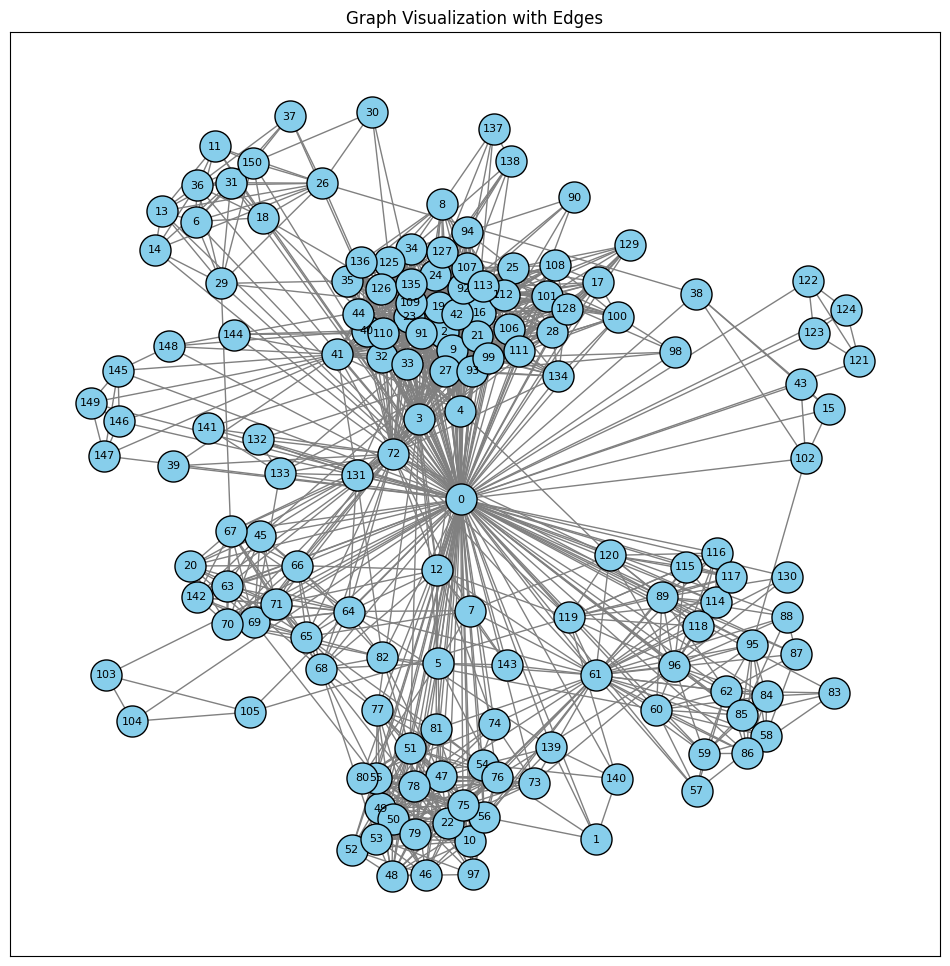

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot

# Load the .dot file content
dot_file_path = 'a.dot'
with open(dot_file_path, 'r') as file:
    dot_content = file.read()

# Clean up the dot content to avoid stray labels
cleaned_dot_content = ''.join(line for line in dot_content.splitlines() if line.strip())

# Use pydot to parse the cleaned dot content
graphs = pydot.graph_from_dot_data(cleaned_dot_content)
graph = nx.drawing.nx_pydot.from_pydot(graphs[0])

# Plot the graph with edges
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(graph, seed=42)
nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='skyblue', edgecolors='black')
nx.draw_networkx_edges(graph, pos, edge_color='gray')
nx.draw_networkx_labels(graph, pos, font_size=8, font_color='black')
plt.title("Graph Visualization with Edges")
plt.show()







## Label Propagation Algorithm

Twelve iterations are visualized, however after Step 4 the numbers of detected communities not changed.

Clusters saved: label_propagation.json


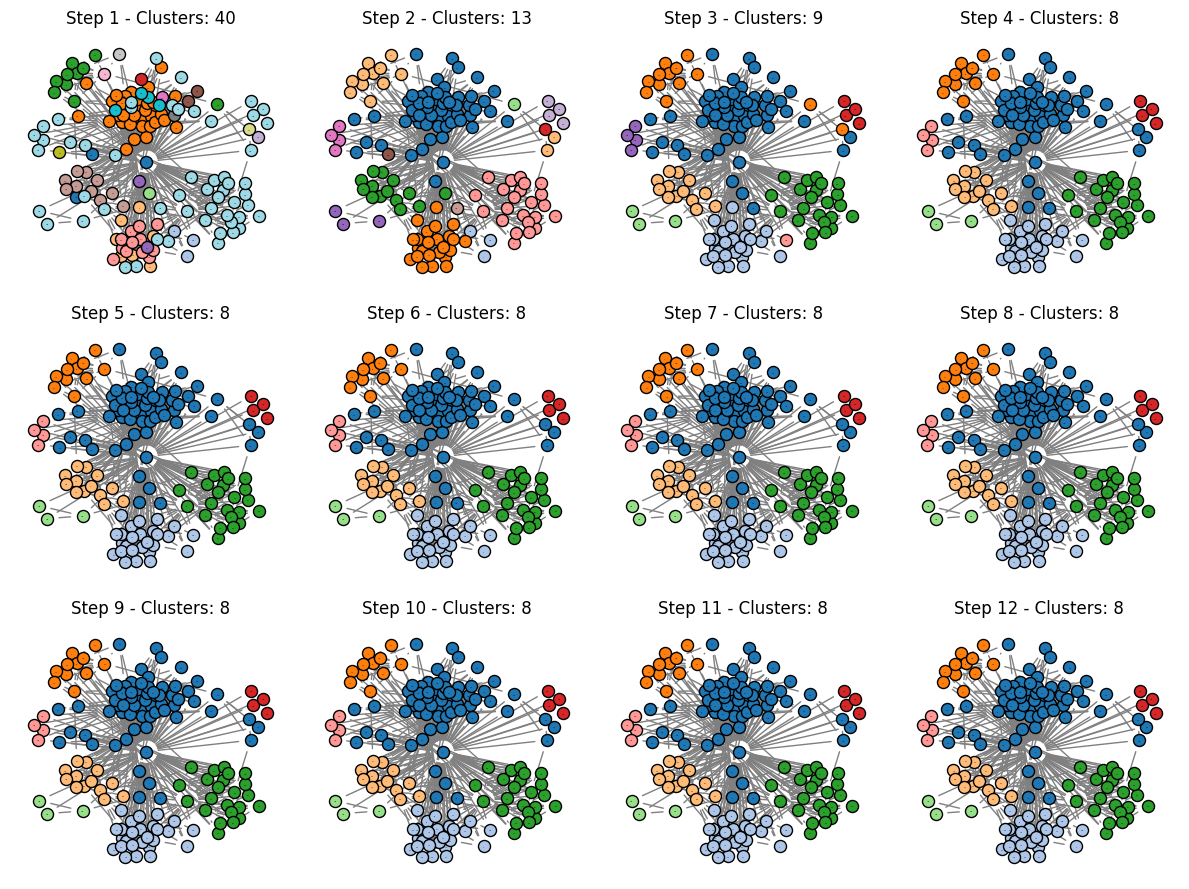

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.algorithms.community import label_propagation_communities
import json

# Load the .dot file content
dot_file_path = 'a.dot'
with open(dot_file_path, 'r') as file:
    dot_content = file.read()

# Clean up the dot content to avoid stray labels
cleaned_dot_content = ''.join(line for line in dot_content.splitlines() if line.strip())

# Use pydot to parse the cleaned dot content
graphs = pydot.graph_from_dot_data(cleaned_dot_content)
graph = nx.drawing.nx_pydot.from_pydot(graphs[0])

def plot_communities(G, communities, ax, title):
    pos = nx.spring_layout(G, seed=42)
    cmap = plt.get_cmap('tab20')
    for i, community in enumerate(communities):
        nx.draw_networkx_nodes(G, pos, nodelist=community, node_size=75, node_color=[cmap(i)], edgecolors='black', ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color='gray', ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=0, font_color='black', ax=ax)
    ax.set_title(title)
    ax.axis('off')

def label_propagation(G, num_steps):
    # Initialize labels with their node ids
    labels = {node: node for node in G.nodes()}

    for step in range(num_steps):
        # Update labels based on the majority label in the neighbors
        new_labels = labels.copy()
        for node in G.nodes():
            neighbor_labels = [labels[neighbor] for neighbor in G.neighbors(node)]
            new_labels[node] = max(set(neighbor_labels), key=neighbor_labels.count)
        labels = new_labels

        # Yield the current community structure
        communities = {}
        for node, label in labels.items():
            communities.setdefault(label, []).append(node)
        yield list(communities.values())

# Number of steps to apply the Label Propagation algorithm
num_steps = 12

# Create a 3x4 plot layout
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
axes = axes.flatten()

# Apply the Label Propagation algorithm and plot each step
for i, communities in enumerate(label_propagation(graph, num_steps)):
    num_clusters = len(communities)
    plot_communities(graph, communities, axes[i], f"Step {i + 1} - Clusters: {num_clusters}")

    # Save the communities to a file if the step is 4
    if i == 3:
        with open('label_propagation.json', 'w') as f:
            json.dump(communities, f)
        print(f"Clusters saved: label_propagation.json")

plt.tight_layout()
plt.show()


## Girvan-Newman Method

Twelve iteration is visualized based on experimental observation of the given network and the algorithm.

Clusters saved: girvan_newman.json


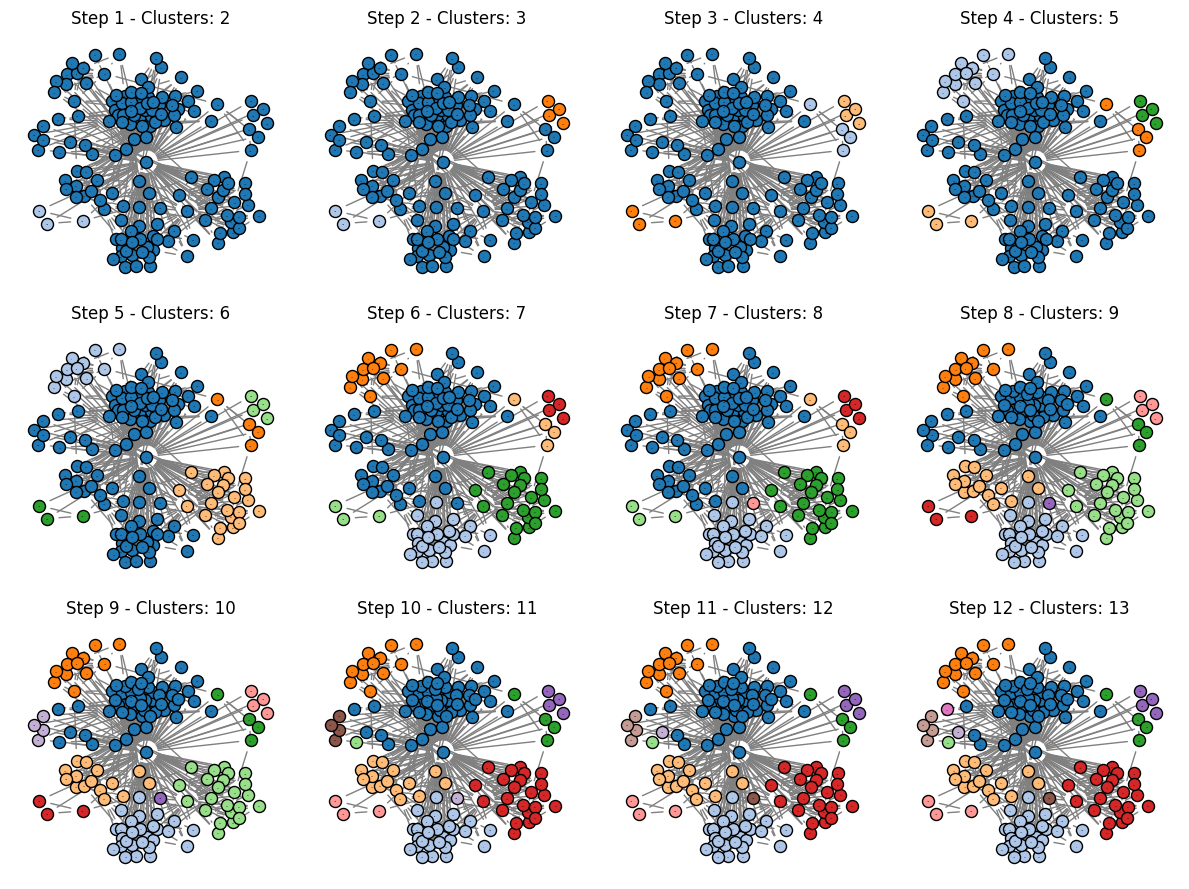

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.algorithms.community import girvan_newman
import json

# Load the .dot file content
dot_file_path = 'a.dot'
with open(dot_file_path, 'r') as file:
    dot_content = file.read()

# Clean up the dot content to avoid stray labels
cleaned_dot_content = ''.join(line for line in dot_content.splitlines() if line.strip())

# Use pydot to parse the cleaned dot content
graphs = pydot.graph_from_dot_data(cleaned_dot_content)
graph = nx.drawing.nx_pydot.from_pydot(graphs[0])

def plot_communities(G, communities, ax, title):
    pos = nx.spring_layout(G, seed=42)
    cmap = plt.get_cmap('tab20')
    for i, community in enumerate(communities):
        nx.draw_networkx_nodes(G, pos, nodelist=community, node_size=75, node_color=[cmap(i)], edgecolors='black', ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color='gray', ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=0, font_color='black', ax=ax)
    ax.set_title(title)
    ax.axis('off')

def apply_girvan_newman(G, num_steps):
    communities_generator = girvan_newman(G)
    for step, communities in enumerate(communities_generator):
        if step >= num_steps:
            break
        yield [list(community) for community in communities]

# Number of steps to apply the Girvan-Newman algorithm
num_steps = 12

# Create a 3x4 plot layout
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
axes = axes.flatten()

# Apply the Girvan-Newman algorithm and plot each step
for i, communities in enumerate(apply_girvan_newman(graph, num_steps)):
    num_clusters = len(communities)
    #print(f"Step {i + 1}: Number of clusters = {num_clusters}")
    plot_communities(graph, communities, axes[i], f"Step {i + 1} - Clusters: {num_clusters}")

    # Save the communities to a file if the number of clusters is 8
    if num_clusters == 8:
        with open(f'girvan_newman.json', 'w') as f:
            json.dump(communities, f)
        print(f"Clusters saved: girvan_newman.json")

plt.tight_layout()
plt.show()


## Hierarchical Clustering

In this method the number of clusters/communities can be defined. Iterated from 1 to 12.

Clusters saved: hierarchical_clusters.json


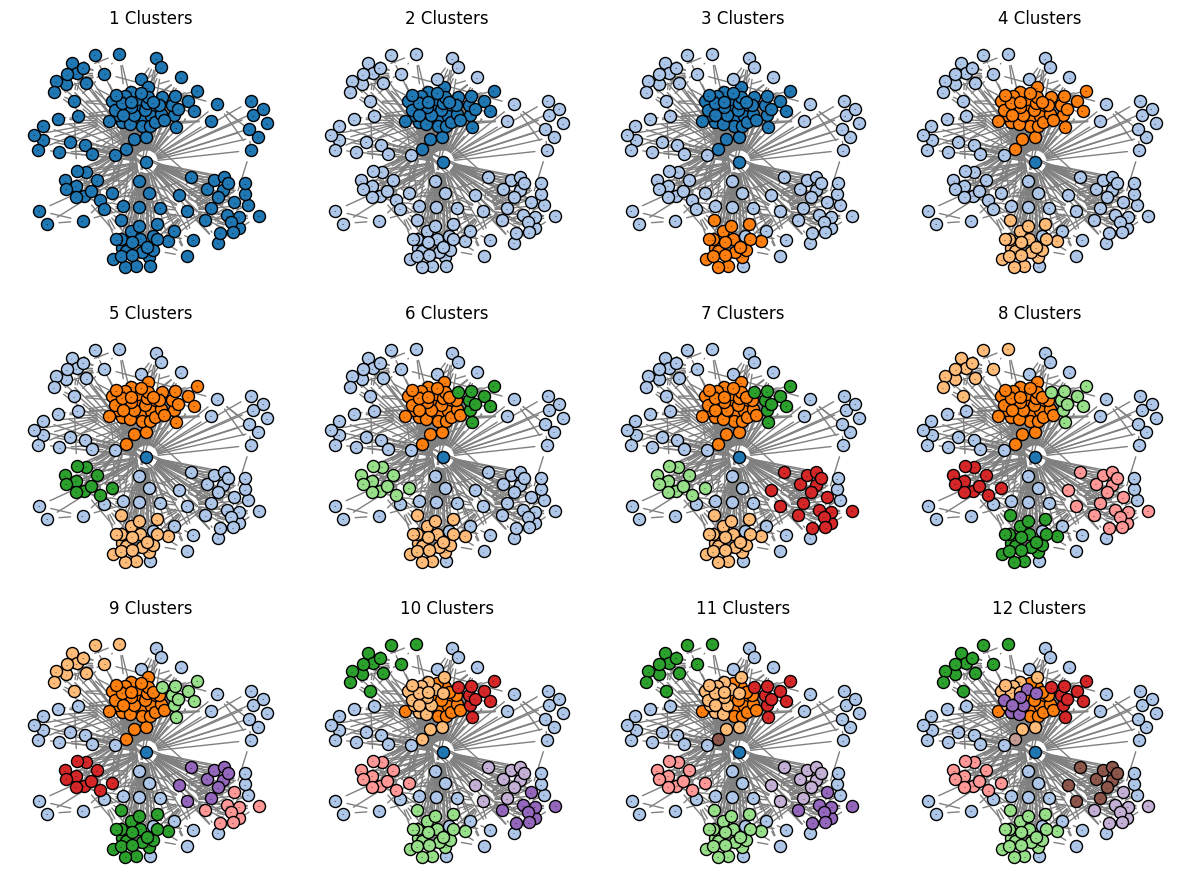

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist, squareform
import numpy as np
import json

# Load the .dot file content
dot_file_path = 'a.dot'
with open(dot_file_path, 'r') as file:
    dot_content = file.read()

# Clean up the dot content to avoid stray labels
cleaned_dot_content = ''.join(line for line in dot_content.splitlines() if line.strip())

# Use pydot to parse the cleaned dot content
graphs = pydot.graph_from_dot_data(cleaned_dot_content)
graph = nx.drawing.nx_pydot.from_pydot(graphs[0])

# Convert graph to adjacency matrix
adj_matrix = nx.to_numpy_array(graph)

# Compute the pairwise distances and perform hierarchical clustering
dist_matrix = pdist(adj_matrix)
linkage_matrix = linkage(dist_matrix, method='ward')

# Define a function to plot the communities
def plot_communities(G, communities, ax, title):
    pos = nx.spring_layout(G, seed=42)
    cmap = plt.get_cmap('tab20')
    for i, community in enumerate(communities):
        nx.draw_networkx_nodes(G, pos, nodelist=community, node_size=75, node_color=[cmap(i)], edgecolors='black', ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color='gray', ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=0, font_color='black', ax=ax)
    ax.set_title(title)
    ax.axis('off')

# Create a 3x4 subplot layout
fig, axes = plt.subplots(3, 4, figsize=(12, 9))

# Iterate over the range of cluster numbers and plot in a 4x3 layout
for num_clusters, ax in zip(range(1, 13), axes.flatten()):
    # Extract clusters
    clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

    # Group nodes by cluster
    communities = {}
    for node, cluster_id in zip(graph.nodes(), clusters):
        if cluster_id not in communities:
            communities[cluster_id] = []
        communities[cluster_id].append(node)

    # Save the communities to a file if the number of clusters is 8
    if num_clusters == 8:
        # Convert keys to strings for JSON serialization
        communities_str_keys = {str(key): value for key, value in communities.items()}
        with open('hierarchical_clusters.json', 'w') as f:
            json.dump(communities_str_keys, f)
        print(f"Clusters saved: hierarchical_clusters.json")

    # Plot the communities
    plot_communities(graph, list(communities.values()), ax, f"{num_clusters} Clusters")

plt.tight_layout()
plt.show()




## Spectral Clustering Community Detection

In this method the number of clusters/communities can be defined. Iterated from 1 to 12.



Clusters saved: spectral_clusters.json


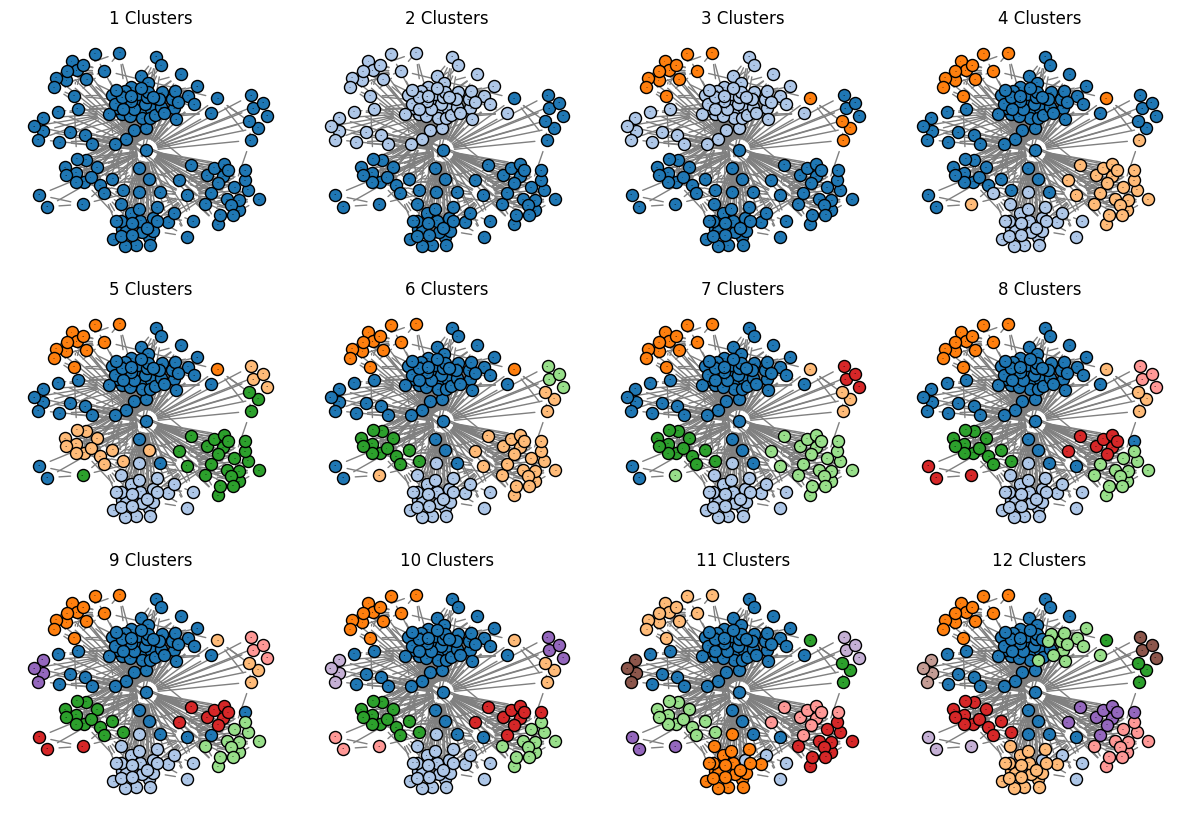

In [ ]:
# file: spectral_clustering_community_detection.py

import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import SpectralClustering
import numpy as np
import pydot

# Load the .dot file content
dot_file_path = 'a.dot'
with open(dot_file_path, 'r') as file:
    dot_content = file.read()

# Clean up the dot content to avoid stray labels
cleaned_dot_content = ''.join(line for line in dot_content.splitlines() if line.strip())

# Use pydot to parse the cleaned dot content
graphs = pydot.graph_from_dot_data(cleaned_dot_content)
graph = nx.drawing.nx_pydot.from_pydot(graphs[0])

# Convert graph to adjacency matrix
adj_matrix = nx.to_numpy_array(graph)

# Create a 4x3 subplot layout
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
axes = axes.flatten()

# Iterate over the range of clusters from 1 to 12
for num_clusters in range(1, 13):
    # Apply spectral clustering
    sc = SpectralClustering(num_clusters, affinity='precomputed', n_init=100)
    labels = sc.fit_predict(adj_matrix)

    # Group nodes by cluster
    communities = {}
    for node, label in zip(graph.nodes(), labels):
        if label not in communities:
            communities[label] = []
        communities[label].append(node)

    # Save the communities to a file if the number of clusters is 8
    if num_clusters == 8:
        # Convert keys to strings for JSON serialization
        communities_str_keys = {str(key): value for key, value in communities.items()}
        with open('spectral_clusters.json', 'w') as f:
            json.dump(communities_str_keys, f)
        print(f"Clusters saved: spectral_clusters.json")

    # Draw the graph in the corresponding subplot
    ax = axes[num_clusters - 1]
    pos = nx.spring_layout(graph, seed=42)
    cmap = plt.get_cmap('tab20')
    for i, community in enumerate(communities.values()):
        nx.draw_networkx_nodes(graph, pos, nodelist=community, node_size=75, node_color=[cmap(i)], edgecolors='black', ax=ax)
    nx.draw_networkx_edges(graph, pos, edge_color='gray', ax=ax)
    nx.draw_networkx_labels(graph, pos, font_size=0, font_color='black', ax=ax)
    ax.set_title(f"{num_clusters} Clusters")
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Calculating the Jaccard-index for each cases

As Label Propagation Algorithm (LPA) detected 8 communities, I used this number for comparison.

In [ ]:
import json
import itertools
import numpy as np
import pandas as pd

# Load JSON files
with open('girvan_newman.json', 'r') as f:
    girvan_newman = json.load(f)

with open('label_propagation.json', 'r') as f:
    label_propagation = json.load(f)

with open('hierarchical_clusters.json', 'r') as f:
    hierarchical_clusters = json.load(f)

with open('spectral_clusters.json', 'r') as f:
    spectral_clusters = json.load(f)

# Function to calculate Jaccard index
def jaccard_index(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Extract community structures as sets
community_structures = [
    [set(community) for community in method]
    for method in [girvan_newman, label_propagation, hierarchical_clusters.values(), spectral_clusters.values()]
]

# Calculate Jaccard indices
labels = ["Girvan-Newman", "LPM", "Hierarchical", "Spectral"]
jaccard_matrix = np.zeros((4, 4))

for i, j in itertools.product(range(4), repeat=2):
    indices = []
    for set1 in community_structures[i]:
        for set2 in community_structures[j]:
            indices.append(jaccard_index(set1, set2))
    jaccard_matrix[i, j] = np.mean(indices)

# Round to 6 decimal places
jaccard_matrix = np.round(jaccard_matrix, 6)

# Create a DataFrame for better visualization
df = pd.DataFrame(jaccard_matrix, index=labels, columns=labels)

# Display the DataFrame
print(df)


               Girvan-Newman       LPM  Hierarchical  Spectral
Girvan-Newman       0.125000  0.092389      0.062385  0.096127
LPM                 0.092389  0.125000      0.074458  0.094165
Hierarchical        0.062385  0.074458      0.125000  0.075099
Spectral            0.096127  0.094165      0.075099  0.125000


**I expected 1.0 values in the principal (main) diagonal, where self comparisons located. It may be a naive approach, but as 0.125 = 1/8 (8 is the number of communities), I simply multiplied every values by 8:**  

In [ ]:
modified_jaccard_matrix = jaccard_matrix * 8

# Create a DataFrame for better visualization
df = pd.DataFrame(modified_jaccard_matrix, index=labels, columns=labels)

# Display the DataFrame
print(df)


               Girvan-Newman       LPM  Hierarchical  Spectral
Girvan-Newman       1.000000  0.739112      0.499080  0.769016
LPM                 0.739112  1.000000      0.595664  0.753320
Hierarchical        0.499080  0.595664      1.000000  0.600792
Spectral            0.769016  0.753320      0.600792  1.000000


I used Code Copilot and corresponding Python Libraries instead of manually develop the algorithms.

https://towardsdatascience.com/community-detection-algorithms-9bd8951e7dae

https://www.analyticsvidhya.com/blog/2022/08/a-comparative-analysis-of-community-detection-algorithms/
(registration needed)

